In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\e2300440\AppData\local\Temp\ipykernel_15072\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [1]:
%matplotlib notebook
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 25.4k/25.4k [00:00<00:00, 25.9MB/s]

Extracting files...
Path to dataset files: C:\Users\e2300440\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [9]:
import os
import shutil

# Le nom du fichier que nous cherchons
filename = "ds_salaries.csv"

# 1. Identifier la source (le chemin affiché dans votre capture)
source_path = os.path.join(path, filename)

# 2. Définir la destination (votre dossier actuel)
destination_path = os.path.join(os.getcwd(), filename)

# 3. Copier le fichier
shutil.copy(source_path, destination_path)

print(f"Fichier copié avec succès vers : {destination_path}")

Fichier copié avec succès vers : H:\SAE 601\Projet-20260204\ds_salaries.csv


In [10]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("ds_salaries.csv")

# Afficher les 5 premières lignes pour vérifier
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

In [13]:
# 1. Connaitre s'il y a des données manquantes
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


#### Votre code

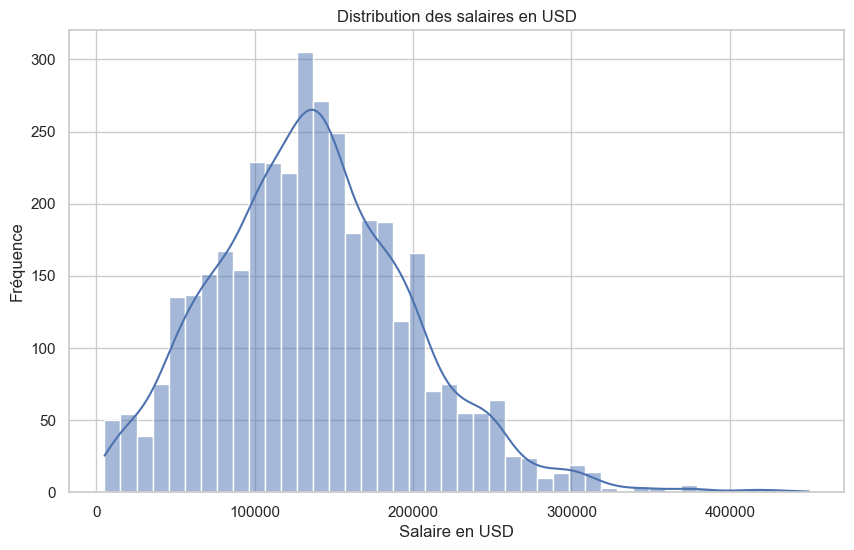

In [26]:

# Création de l'histogramme
plt.figure(figsize=(10, 6),)
sns.histplot(df['salary_in_usd'], kde=True)

plt.title('Distribution des salaires en USD')
plt.xlabel('Salaire en USD')
plt.ylabel('Fréquence')
plt.show()

In [19]:
# Salaires moyens
print("Salaire moyen par rôle")
print(df.groupby('job_title')['salary_in_usd'].mean())

print("\nSalaire moyen par pays")
print(df.groupby('company_location')['salary_in_usd'].mean())

print("\nSalaire moyen par niveau d'expérience")
print(df.groupby('experience_level')['salary_in_usd'].mean())

Salaire moyen par rôle
job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64

Salaire moyen par pays
company_location
AE    100000.000000
AL     10000.000000
AM     50000.000000
AR     25000.000000
AS     29351.000000
          ...      
TH     23064.333333
TR     19058.000000
UA     57850.000000
US    151822.009539
VN     12000.000000
Name: salary_in_usd, Length: 72, dtype: float64

Salaire moyen par niveau d'expérience
experience_level
EN     78546.284375
EX    194930.9298

#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [21]:
# Filtrer les salaires pour les US
df_us = df[df['company_location'] == 'US']
print(df_us)


      work_year experience_level employment_type                 job_title  \
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
5          2023               SE              FT         Applied Scientist   
6          2023               SE              FT         Applied Scientist   
9          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3749       2021               SE              FT           Data Specialist   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   

      salary salary_currency  salary_in_usd employee_residence 

In [22]:
# Top 5 des pays qui paient le plus
top_5_pays = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(5)
top_5_pays

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
Name: salary_in_usd, dtype: float64

In [32]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
# Afficher les employés avec un salaire > 100 000 USD et leur rôle
salaires_hauts = df[df['salary_in_usd'] > 100000][['job_title', 'salary_in_usd']]
print(salaires_hauts)

pays_teletravail = df[df['remote_ratio'] == 100]['company_location'].value_counts()
print(pays_teletravail)
# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)


                               job_title  salary_in_usd
3                         Data Scientist         175000
4                         Data Scientist         120000
5                      Applied Scientist         222200
6                      Applied Scientist         136000
7                         Data Scientist         219000
...                                  ...            ...
3747  Applied Machine Learning Scientist         423000
3749                     Data Specialist         165000
3750                      Data Scientist         412000
3751            Principal Data Scientist         151000
3752                      Data Scientist         105000

[2665 rows x 2 columns]
company_location
US    1331
GB      65
CA      46
IN      30
DE      25
ES      23
BR      13
FR      12
GR      10
MX       9
AU       7
NL       6
NG       5
PL       5
PT       4
PR       4
SI       3
IE       3
AR       3
CF       2
CH       2
AE       2
SG       2
CZ       2
KE       2
BE       2


In [24]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)
moyenne_remote = df[df['remote_ratio'] == 100]['salary_in_usd'].mean()
print(f"Salaire moyen télétravail : {moyenne_remote}")

# Comparaison des salaires moyens pour deux catégories
comparaison_experience = df.groupby('experience_level')['salary_in_usd'].mean()
print(comparaison_experience)
# Comparer salaires moyens pour deux catégories



Salaire moyen télétravail : 136481.45283018867
experience_level
EN     78546.284375
EX    194930.929825
MI    104525.939130
SE    153051.071542
Name: salary_in_usd, dtype: float64


In [25]:
# Ajouter une colonne pour les fourchettes de salaires
df['salary_range'] = pd.cut(df['salary_in_usd'], bins=3, labels=['Low', 'Medium', 'High'])
df[['salary_in_usd', 'salary_range']].head()


,salary_in_usd,salary_range
0,85847,Low
1,30000,Low
2,25500,Low
3,175000,Medium
4,120000,Low


In [28]:
# Analyse des corrélations
# Relation entre télétravail et salaire
# Corrélation numérique
correlation = df['remote_ratio'].corr(df['salary_in_usd'])
print(f"Corrélation télétravail/salaire : {correlation}")

Corrélation télétravail/salaire : -0.06417098519057557


In [29]:
# Salaire moyen par taille d'entreprise
# Salaire moyen selon 'company_size'
print(df.groupby('company_size')['salary_in_usd'].mean())

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64


In [31]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
tableau_croise = df.pivot_table(values='salary_in_usd', index='experience_level', columns='remote_ratio', aggfunc='mean')
tableau_croise

remote_ratio,0,50,100
experience_level,,,
EN,104581.765766,64006.230769,65040.486111
EX,182435.785714,139030.166667,214837.326923
MI,116723.103535,74214.405405,96803.480597
SE,154024.064706,98438.136364,154022.023381
